In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir1 = '/uscms_data/d3/mkim/MKWorkingArea/CMSSW_10_2_0/src/JL/Melrose/P2_CMSSW_10_1_5/src/L1TMuonSimulations/Analyzers/'

infile_muon = dir1 + 'test7/histos_tba.20.npz'

infile_pileup = dir1 + 'test7/histos_tbd.20.npz'

infile_muon_omtf = dir1 + 'test7/histos_tba_omtf.22.npz'

infile_pileup_omtf = dir1 + 'test7/histos_tbd_omtf.22.npz'

In [3]:
muon_detector_data = np.load(infile_muon)

In [4]:
print(muon_detector_data)

In [5]:
muon_detector_data.keys()

['variables', 'parameters']

In [6]:
X = muon_detector_data['variables']
y = muon_detector_data['parameters']

In [7]:
print(X.shape)

(3272341, 87)


In [8]:
print(X[1:100,24])

[-18.459759          nan -13.        -13.          7.        -24.
  25.843662  -16.613783  -13.          0.                nan         nan
  10.          6.         25.843662    0.         -5.        -16.613783
   9.          6.         22.15171           nan         nan -17.
 -18.459759    0.                nan  13.        -18.459759  -12.
         nan  -5.                nan         nan   0.        -33.
         nan -18.                nan         nan         nan -24.
   5.5379276 -29.        -13.         -6.         -6.         11.075855
 -28.         10.        -18.459759  -19.         35.073544          nan
         nan  10.          0.          5.                nan         nan
         nan  -9.229879    0.                nan   0.          0.
  11.075855    0.         16.613783          nan         nan  18.459759
         nan  11.075855  -19.        -14.767807          nan  24.
 -11.          0.         -5.5379276  14.        -18.                nan
 -10.          9.         29. 

In [235]:
np.clip(X[:,24],-40,40,out=X[:,24])

array([ 22.15171 , -18.459759,        nan, ...,   0.      ,        nan,
       -40.      ], dtype=float32)

In [237]:
np.nanmax(X[:,24])

40.0

In [263]:
nanlist = np.isnan(X[:,24])

In [255]:
two2n=2**8+1
digi = np.linspace(-40,40,num=two2n)
#print(digi)

In [260]:
yesnan = digi[np.digitize(X[:,24],digi)-1]

In [264]:
yesnan[nanlist] = 0

In [265]:
yesnan

array([ 21.875, -18.75 ,   0.   , ...,   0.   ,   0.   , -40.   ])

In [9]:
import pandas as pd

In [10]:
dfX = pd.DataFrame(X)

In [11]:
dfX.head(10)

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,3190.0,NaN,3546.0,3568.0,NaN,NaN,NaN,3568.0,NaN,3127.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,108.0
1,2865.0,NaN,2622.0,2608.0,NaN,NaN,NaN,2604.0,2600.0,NaN,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,84.0
2,NaN,1415.0,1455.0,1440.0,1408.0,1440.0,1460.0,1424.0,NaN,NaN,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,5.0,45.0
3,3484.0,NaN,3328.0,3328.0,3360.0,NaN,NaN,3336.0,NaN,3520.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,105.0
4,4867.0,NaN,NaN,4648.0,4688.0,NaN,NaN,4656.0,4696.0,4923.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,146.0
5,3875.0,NaN,4008.0,4024.0,4032.0,NaN,NaN,4028.0,4032.0,3850.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,124.0
6,4308.0,NaN,3838.0,NaN,NaN,NaN,NaN,NaN,NaN,4387.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,8.0,1.0,124.0
7,3426.0,NaN,3720.0,3808.0,NaN,NaN,NaN,3816.0,3860.0,NaN,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,116.0
8,4269.0,NaN,4022.0,3976.0,3928.0,NaN,NaN,3956.0,3904.0,NaN,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,127.0
9,2096.0,NaN,1872.0,1872.0,1910.0,NaN,NaN,1876.0,NaN,2142.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,6.0,2.0,60.0


In [220]:
cc=23
dfX1 = dfX.iloc[:,cc]
dfX1.head(10)

0    22.0
1     8.0
2     NaN
3     NaN
4     NaN
5    22.0
6    22.0
7     8.0
8     8.0
9     NaN
Name: 23, dtype: float32

In [221]:
u1 = dfX1.unique()

u1.sort()

#print(u1) #261
len1=len(u1)-1
print(cc)

23


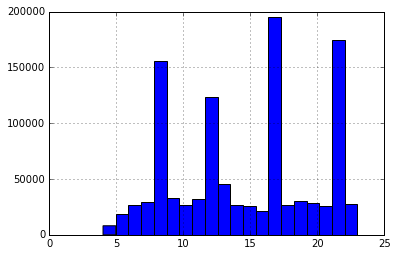

In [222]:
dfX1.hist(bins=len1)

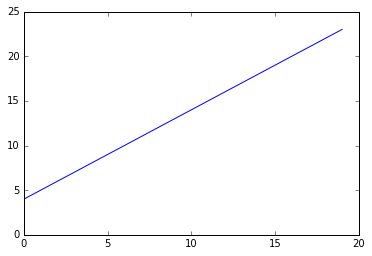

In [223]:
plt.plot(u1)

In [131]:
dfX1[dfX1[60]==0]

0.0

In [31]:
dfX1.sort_values(by=[24],ascending=False)

,0,12,24,36,48,60,72
2430536,2361.0,13.0,142.140137,0.0,4.0,1.0,0.0
2223471,2465.0,9.0,142.140137,0.0,4.0,0.0,0.0
1720550,2892.0,15.0,136.602219,0.0,4.0,0.0,0.0
960006,2484.0,9.0,136.602219,0.0,4.0,0.0,0.0
1787048,2956.0,5.0,123.680382,0.0,4.0,0.0,0.0
3153700,2284.0,30.0,120.000000,0.0,1.0,1.0,0.0
3023803,1297.0,15.0,119.988434,0.0,4.0,1.0,0.0
892954,2522.0,17.0,119.988434,0.0,4.0,1.0,0.0
1168861,2501.0,15.0,116.296478,0.0,4.0,0.0,0.0
1655904,2149.0,8.0,116.296478,0.0,4.0,1.0,0.0


In [16]:
dfX1.max()

0     4987.000000
12      53.000000
24     142.140137
36       0.000000
48       4.000000
60       1.000000
72       1.000000
dtype: float32

In [17]:
dfX1.min()

0     662.000000
12      5.000000
24   -132.910263
36     -1.000000
48      1.000000
60      0.000000
72      0.000000
dtype: float32

In [18]:
dfX1.hist(24,bins=64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4af2fb150>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4af01fc50>]],
      dtype=object)

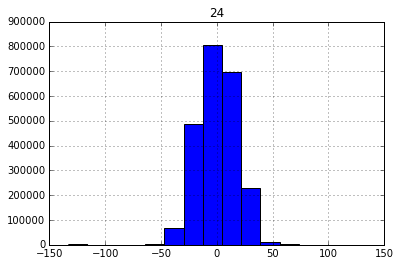

In [19]:
dfX1.hist(24,bins=16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4af06e950>]],
      dtype=object)

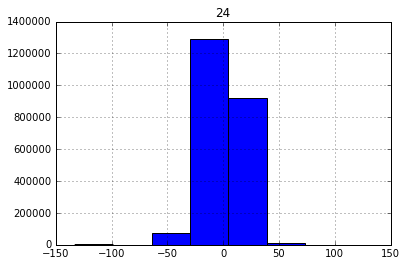

In [20]:
dfX1.hist(24,bins=8)

In [ ]:
dfX1.hist(24,bins=4)